# Dunia Jaser 1201345

Initial Setup

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Data augmentation and normalization for training
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to fit the input size of AlexNet and VGG16
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:06<00:00, 28186776.90it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Function to Display Images

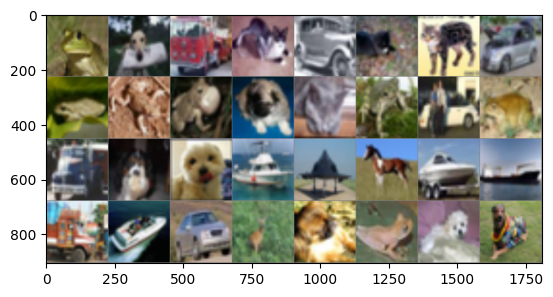

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


Training Function

In [ ]:
def train_model(model, criterion, optimizer, trainloader, epochs=3, device='cuda:0'):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 200 == 199:
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
                running_loss = 0.0

    print('Finished Training')


frog  dog   truck cat   car   cat   cat   car   frog  frog  frog  dog   cat   frog  car   frog  truck dog   dog   ship  plane horse ship  ship  truck ship  car   deer  dog   frog  dog   dog  


Evaluation Function


In [ ]:
def evaluate_model(model, testloader, device='cuda:0'):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    print(f'Accuracy of the network on the test images: {accuracy:.2f}%')
    return accuracy


Fine-tuning


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Fine-tuning AlexNet
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, 10)
alexnet = alexnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_alexnet = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

train_model(alexnet, criterion, optimizer_alexnet, trainloader, epochs=3, device=device)
accuracy_alexnet_finetune = evaluate_model(alexnet, testloader, device=device)

# Fine-tuning VGG16
vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(vgg16.classifier[6].in_features, 10)
vgg16 = vgg16.to(device)

optimizer_vgg16 = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)

train_model(vgg16, criterion, optimizer_vgg16, trainloader, epochs=3, device=device)
accuracy_vgg16_finetune = evaluate_model(vgg16, testloader, device=device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 173MB/s]


[1,   200] loss: 1.103
[1,   400] loss: 0.760
[1,   600] loss: 0.616
[1,   800] loss: 0.560
[1,  1000] loss: 0.517
[1,  1200] loss: 0.523
[1,  1400] loss: 0.482
[2,   200] loss: 0.417
[2,   400] loss: 0.389
[2,   600] loss: 0.406
[2,   800] loss: 0.378
[2,  1000] loss: 0.377
[2,  1200] loss: 0.362
[2,  1400] loss: 0.372
[3,   200] loss: 0.297
[3,   400] loss: 0.313
[3,   600] loss: 0.311
[3,   800] loss: 0.286
[3,  1000] loss: 0.288
[3,  1200] loss: 0.283
[3,  1400] loss: 0.295
Finished Training
Accuracy of the network on the test images: 89.09%


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 173MB/s]


[1,   200] loss: 0.895
[1,   400] loss: 0.515
[1,   600] loss: 0.413
[1,   800] loss: 0.385
[1,  1000] loss: 0.365
[1,  1200] loss: 0.347
[1,  1400] loss: 0.317
[2,   200] loss: 0.222
[2,   400] loss: 0.230
[2,   600] loss: 0.218
[2,   800] loss: 0.214
[2,  1000] loss: 0.227
[2,  1200] loss: 0.218
[2,  1400] loss: 0.206
[3,   200] loss: 0.131
[3,   400] loss: 0.147
[3,   600] loss: 0.152
[3,   800] loss: 0.138
[3,  1000] loss: 0.148
[3,  1200] loss: 0.153
[3,  1400] loss: 0.136
Finished Training
Accuracy of the network on the test images: 92.47%


ConvNet as Fixed Feature Extractor


In [ ]:
# ConvNet as fixed feature extractor for AlexNet
alexnet = models.alexnet(pretrained=True)
for param in alexnet.parameters():
    param.requires_grad = False
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, 10)
alexnet = alexnet.to(device)

optimizer_alexnet = optim.SGD(alexnet.classifier[6].parameters(), lr=0.001, momentum=0.9)

train_model(alexnet, criterion, optimizer_alexnet, trainloader, epochs=3, device=device)
accuracy_alexnet_feature_extractor = evaluate_model(alexnet, testloader, device=device)

# ConvNet as fixed feature extractor for VGG16
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.parameters():
    param.requires_grad = False
vgg16.classifier[6] = nn.Linear(vgg16.classifier[6].in_features, 10)
vgg16 = vgg16.to(device)

optimizer_vgg16 = optim.SGD(vgg16.classifier[6].parameters(), lr=0.001, momentum=0.9)

train_model(vgg16, criterion, optimizer_vgg16, trainloader, epochs=3, device=device)
accuracy_vgg16_feature_extractor = evaluate_model(vgg16, testloader, device=device)


[1,   200] loss: 1.188
[1,   400] loss: 0.969
[1,   600] loss: 0.928
[1,   800] loss: 0.878
[1,  1000] loss: 0.884
[1,  1200] loss: 0.865
[1,  1400] loss: 0.853
[2,   200] loss: 0.849
[2,   400] loss: 0.829
[2,   600] loss: 0.848
[2,   800] loss: 0.837
[2,  1000] loss: 0.801
[2,  1200] loss: 0.812
[2,  1400] loss: 0.815
[3,   200] loss: 0.791
[3,   400] loss: 0.810
[3,   600] loss: 0.798
[3,   800] loss: 0.788
[3,  1000] loss: 0.796
[3,  1200] loss: 0.800
[3,  1400] loss: 0.775
Finished Training
Accuracy of the network on the test images: 77.18%
[1,   200] loss: 1.226
[1,   400] loss: 0.866
[1,   600] loss: 0.820
[1,   800] loss: 0.792
[1,  1000] loss: 0.806
[1,  1200] loss: 0.780
[1,  1400] loss: 0.757
[2,   200] loss: 0.749
[2,   400] loss: 0.740
[2,   600] loss: 0.726
[2,   800] loss: 0.758
[2,  1000] loss: 0.745
[2,  1200] loss: 0.737
[2,  1400] loss: 0.708
[3,   200] loss: 0.704
[3,   400] loss: 0.743
[3,   600] loss: 0.726
[3,   800] loss: 0.691
[3,  1000] loss: 0.726
[3,  1200] 

Compare Results


In [ ]:
print(f'Accuracy of fine-tuned AlexNet: {accuracy_alexnet_finetune:.2f}%')
print(f'Accuracy of AlexNet as fixed feature extractor: {accuracy_alexnet_feature_extractor:.2f}%')
print(f'Accuracy of fine-tuned VGG16: {accuracy_vgg16_finetune:.2f}%')
print(f'Accuracy of VGG16 as fixed feature extractor: {accuracy_vgg16_feature_extractor:.2f}%')


Accuracy of fine-tuned AlexNet: 89.09%
Accuracy of AlexNet as fixed feature extractor: 77.18%
Accuracy of fine-tuned VGG16: 92.47%
Accuracy of VGG16 as fixed feature extractor: 78.44%


# Alexnet Block Diagram

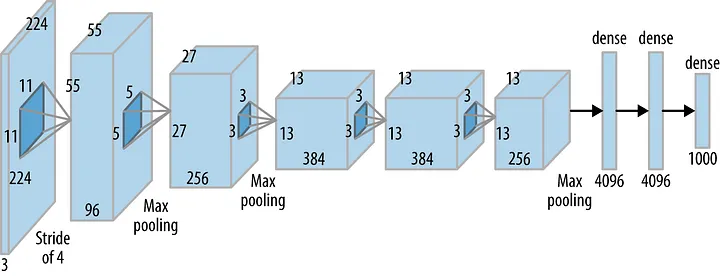

# VGG16 Block Diagram

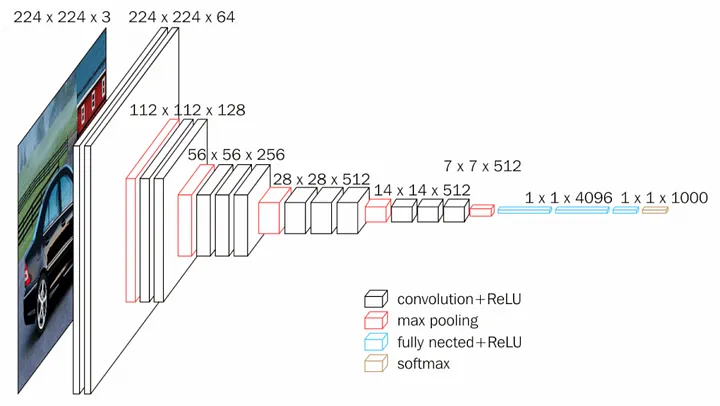

1. Both models achieved significantly higher accuracy with fine-tuning compared to when used as fixed feature extractors. This demonstrates that allowing the models to adjust all layers to the specific features of the CIFAR10 dataset rather than just the final classifier improves performance.

2. VGG16 consistently outperforms AlexNet in both setups. This can be attributed to VGG16’s deeper and more complex architecture as shown above in the figures, which enables it to learn more detailed features from the data.

3. The depth of VGG16, which includes multiple convolutional layers, helps in capturing a broader range of features compared to AlexNet. This depth is beneficial for adapting the pre-trained model to new tasks through fine-tuning.

4. While using a fixed feature extractor results in lower accuracy, it also requires significantly less computational power and training time since only the classifier layer is being updated. This method might be preferable in scenarios where computational resources are limited or rapid deployment is necessary.